# NumPy for Computer Vision Fundamentals

*A Complete Beginner-Friendly Notebook*


# 1: Why NumPy in Computer Vision?

In Computer Vision (CV), we work with images.

An image is just a matrix of numbers (pixels).

Each pixel has an intensity value (for grayscale) or 3 values (for RGB: Red, Green, Blue).

To work with these efficiently, we need fast numerical operations → That’s where NumPy comes in.

Example:

*  A grayscale image of size 28×28 = 784 numbers.

*  A color image of size 1920×1080 = ~2 million pixels × 3 channels = 6 million numbers.

*  Without NumPy, handling these numbers would be very slow.

#  2: Importing NumPy

In [1]:
import numpy as np


NumPy is imported with the alias np everywhere (global standard), makes our code neat.

We’ll use it to create and manipulate arrays, which represent images in computer vision.

#  3: Arrays – The Language of Images

In [2]:
x = [1, 2, 3, 4, 5]  # A simple Python list
arr = np.array(x)     # Convert list to NumPy array
arr


array([1, 2, 3, 4, 5])

Think of arr as a row of pixels with intensity values.

Why important for CV?

A 1D array can represent a row of pixels.

A 2D array can represent a grayscale image.

A 3D array can represent a color image (RGB).

In [3]:
# Extra: 1D, 2D, 3D Arrays in Practice

# 1D Array → Single row of pixels
one_d = np.array([0, 128, 255])
print("1D Array (line of pixels):\n", one_d)

# 2D Array → Grayscale image (3x3 pixels)
two_d = np.array([
    [0, 128, 255],
    [64, 192, 32],
    [255, 0, 128]
])
print("\n2D Array (Grayscale image):\n", two_d)

# 3D Array → RGB Image (3x3 pixels with 3 channels)
three_d = np.random.randint(0, 256, (3,3,3))
print("\n3D Array (RGB image):\n", three_d)


1D Array (line of pixels):
 [  0 128 255]

2D Array (Grayscale image):
 [[  0 128 255]
 [ 64 192  32]
 [255   0 128]]

3D Array (RGB image):
 [[[ 37  83  77]
  [226 219  35]
  [ 11  38  62]]

 [[180 220  91]
  [ 92 129 134]
  [219  57 130]]

 [[253 140 108]
  [235  11 117]
  [ 43  32  94]]]


Arrays are simply different ways to "Store" images in numbers.

1D array → row of pixels.

2D array → grayscale image (each value = intensity).

3D array → RGB image (each pixel has 3 values).

#  4: Array Type

In [4]:
type(arr)


numpy.ndarray


Images in CV are always stored as ndarray (N-dimensional array).

#  5: Creating Arrays Like Images





In [5]:
# Create continuous pixel values
np.arange(1, 15)    # 1D row
np.arange(1, 11, 1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

This is like creating synthetic pixel rows.

# Creating Arrays of Zeros & Ones


In [6]:
# Grayscale image placeholders
np.zeros((2, 4))  # 2x4 black patch
np.ones((2, 7))   # 2x7 white patch


array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In CV:

* np.zeros() → Black image (pixel intensity = 0).

* np.ones() → White image (pixel intensity = 1 or scaled to 255).

#  6: Random Numbers – Synthetic Data


In [7]:

# Using a seed makes results reproducible.
# Without a seed, you'll get different random numbers each time you run the cell.
# With a seed, you (and others) will always get the same output → useful for debugging and collaboration.

np.random.seed(51)
arr1 = np.random.randint(10, 1000, 50)
arr1



array([ 67, 495, 746, 979, 719, 538, 927, 744, 446, 371, 943, 644, 888,
       559, 582, 872,  38, 862, 686, 173, 933,  38, 436, 894, 916,  16,
       803, 427, 471, 510, 945, 314,  34, 690,  64, 727, 894,  38, 847,
       579, 796, 201,  85, 717, 262, 360, 481, 913, 775, 973])

Random arrays are often used in testing image processing algorithms.

They are useful as they simulates random noise in images.

#  7: Reshaping Arrays as Images

In [8]:
arr1.reshape(5, 10)   # 5x10 matrix


array([[ 67, 495, 746, 979, 719, 538, 927, 744, 446, 371],
       [943, 644, 888, 559, 582, 872,  38, 862, 686, 173],
       [933,  38, 436, 894, 916,  16, 803, 427, 471, 510],
       [945, 314,  34, 690,  64, 727, 894,  38, 847, 579],
       [796, 201,  85, 717, 262, 360, 481, 913, 775, 973]])

A 2D matrix like this can represent a grayscale image patch.

In [9]:
arr2 = np.random.randint(0, 1000, 50)
arr2.reshape(10, 5)  # 10x5 patch


array([[219, 701, 760, 290, 437],
       [158,  55, 529, 707, 117],
       [621, 648, 441, 806, 141],
       [837,  87,  69, 241,  52],
       [641,  49,   3, 278, 667],
       [343, 866, 451, 509, 617],
       [641, 504, 318, 419, 919],
       [435,  95, 755, 477, 340],
       [788, 509, 794, 308, 637],
       [912, 174, 752, 995, 631]])

In CV:

Reshape is used when converting images into vectors (for ML models) or back into matrices (for visualization).

#  8: Array Statistics in Vision

In [10]:
arr1.max()      # Brightest pixel
arr1.min()      # Darkest pixel
arr1.mean()     # Average intensity
arr1.argmax()   # Position of brightest pixel
arr1.argmin()   # Position of darkest pixel


np.int64(25)

In CV applications:

max() → Find brightest spot in an image.

min() → Find darkest region.

mean() → Estimate overall brightness.

argmax() → Useful for feature maps in deep learning.

#  9: Indexing & Slicing Images

In [11]:
arr3 = np.random.randint(0, 255, 50).reshape(10, 5)  # 10x5 grayscale patch
# (0, 255, 50) means:
# 0   → minimum possible pixel value (black)
# 255 → maximum possible pixel value (white)
# 50  → number of random elements generated


arr3[0, 0]      # Top-left pixel
arr3[:, 0]      # First column (vertical slice)
arr3[0, :]      # First row (horizontal slice)
arr3[0:5, 0:5]  # Top-left 5x5 patch


array([[137,  53, 222, 244,  47],
       [ 84, 125, 102, 222, 110],
       [157, 103,  74, 233, 172],
       [253,  76, 184, 188,  77],
       [128, 244, 197,  20, 158]])

In CV:

* Indexing lets us extract specific pixels or regions of interest (ROI).

* Slicing helps crop sub-images or patches.

#  10: Modifying Pixels

In [12]:
arr3[0:5, 0:5] = 1
arr3


array([[  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [105,  66, 168,  95, 133],
       [239,  12,  38, 226, 199],
       [167, 100, 220, 181, 146],
       [ 41,  46, 209, 116,  75],
       [ 83, 140, 172, 111, 175]])

This simulates drawing a white square on the image.

Pixel manipulation is the foundation of filters CV tasks like masking, filters, ROI marking.

#  11: Safe Copying

In [13]:
arr5 = arr3.copy()
arr5


array([[  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1],
       [105,  66, 168,  95, 133],
       [239,  12,  38, 226, 199],
       [167, 100, 220, 181, 146],
       [ 41,  46, 209, 116,  75],
       [ 83, 140, 172, 111, 175]])

Important in CV:

* Without .copy(), modifying one image might change another.

* Needed when creating augmented images or training/testing sets.

#  12: Images as NumPy Arrays

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("/content/chinar_img.webp")  # Load an image
img_array = np.array(img)                       # Convert to NumPy array
img_array.shape

(1600, 1200, 3)

Example: (480, 640, 3) → height=480, width=640, 3 channels (RGB).

In CV, every image is just a NumPy array.

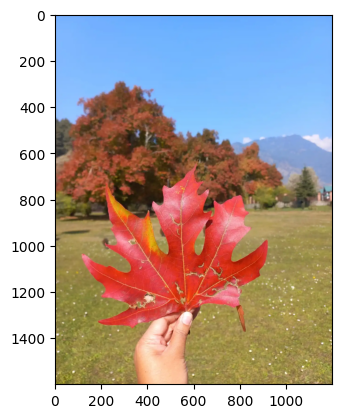

In [15]:
plt.imshow(img_array)  # Show image

#  13: Splitting Color Channels


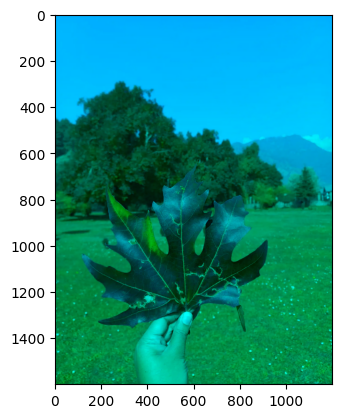

In [16]:
img1 = img_array.copy()
img2 = img_array.copy()
img3 = img_array.copy()

# Remove Red
img1[:, :, 0] = 0
plt.imshow(img1)






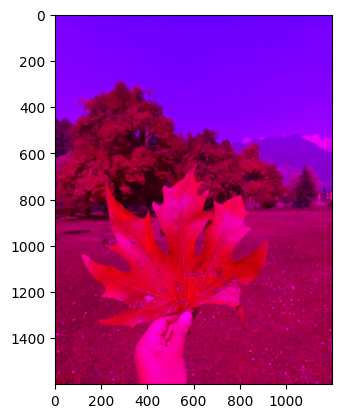

In [17]:
# Remove Green
img2[:, :, 1] = 0
plt.imshow(img2)

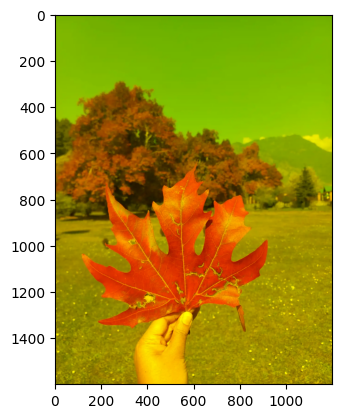

In [18]:
# Remove Blue
img3[:, :, 2] = 0
plt.imshow(img3)

By removing channels (R, G, B), we understand how each contributes to the image.

Applications:

* Color segmentation.

* Object detection (e.g., tracking a red ball).

In this notebook, we saw how:

* NumPy arrays = the language of images.

*  We can create, reshape, index, and modify images like numbers.

*  Real-world images can be loaded and manipulated with ease.

This sets the foundation. In the next notebook, we’ll build on this and explore how to perform basic image processing operations like transformations, filtering, and visual effects.